In [30]:
import pandas as pd

In [31]:
df_train = pd.read_csv('/home/ankur/Desktop/ML_DL_Projects/data/mitsui-commodity-prediction-challenge/train.csv')
df_train_label = pd.read_csv('/home/ankur/Desktop/ML_DL_Projects/data/mitsui-commodity-prediction-challenge/train_labels.csv')
df_target_pairs = pd.read_csv('/home/ankur/Desktop/ML_DL_Projects/data/mitsui-commodity-prediction-challenge/target_pairs.csv')

In [32]:
df_train.shape

(1917, 558)

In [33]:
train_all_columns = df_train.columns.to_list()
len(train_all_columns)

558

In [34]:
train_LME = [x for x in train_all_columns if x[0:4]=='LME_']
train_US = [x for x in train_all_columns if x[0:9]=='US_Stock_']
train_JP = [x for x in train_all_columns if x[0:4]=='JPX_']
train_FX = [x for x in train_all_columns if x[0:3]=='FX_']
data = len(train_LME)+ len(train_US)+len(train_JP)+len(train_FX)
data 



557

In [43]:
import matplotlib.pyplot as plt

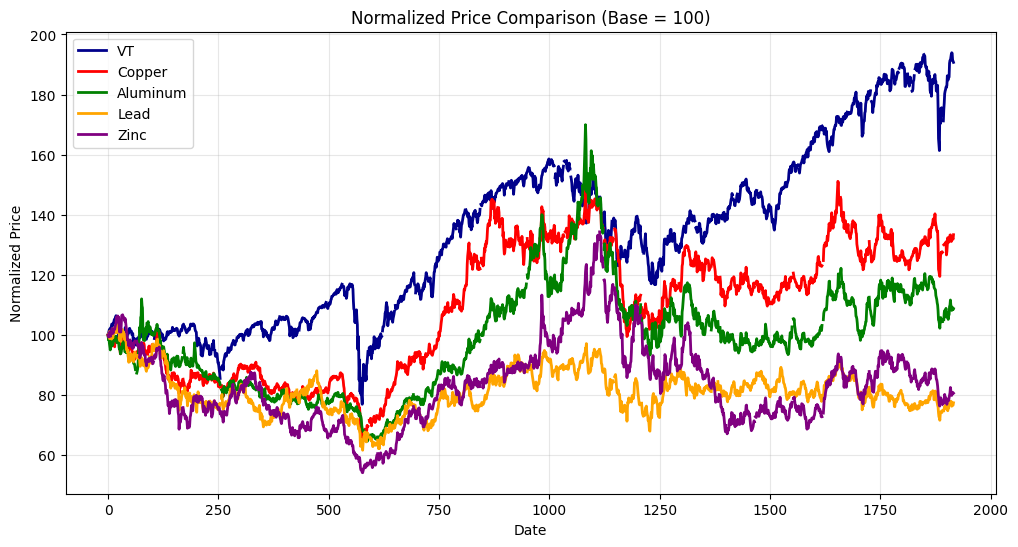

In [56]:
# Normalize data to start at 100 for easier comparison
plt.figure(figsize=(12, 6))

columns = ['US_Stock_VT_adj_close', 'LME_CA_Close', 'LME_AH_Close', 'LME_PB_Close', 'LME_ZS_Close']
colors = ['darkblue', 'red', 'green', 'orange', 'purple']
labels = ['VT', 'Copper', 'Aluminum', 'Lead', 'Zinc']

for col, color, label in zip(columns, colors, labels):
    # Normalize to start at 100
    normalized_data = (df_train[col] / df_train[col].iloc[0]) * 100
    plt.plot(df_train.date_id, normalized_data, color=color, label=label, linewidth=2)

plt.title('Normalized Price Comparison (Base = 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

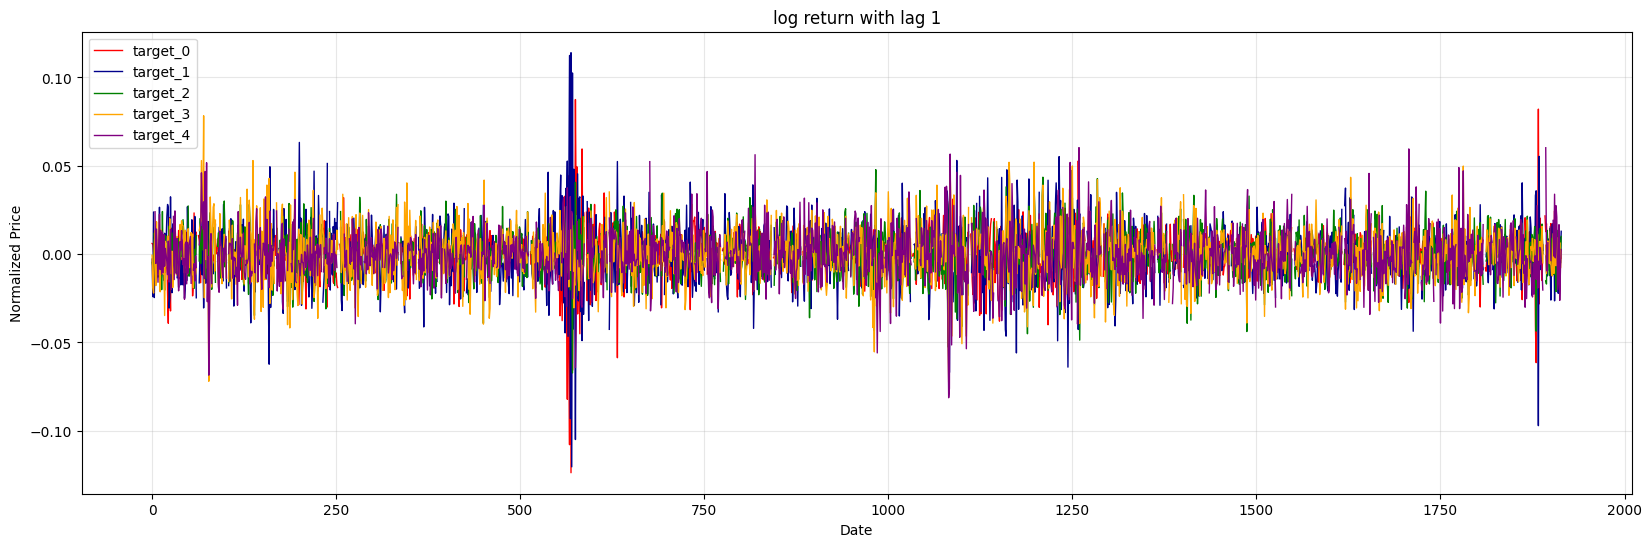

In [ ]:
plt.figure(figsize=(20, 6))

columns = ['target_0','target_1']
# ,'target_2','target_3','target_4']
colors = ['red','darkblue'], 'green', 'orange', 'purple']
labels = ['target_0','target_1','target_2','target_3','target_4']

for col, color, label in zip(columns, colors, labels):
    # Normalize to start at 100
    plt.plot(df_train_label.date_id, df_train_label[col] , color=color, label=label, linewidth=1)

plt.title('log return with lag 1')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Plotting columns: ['target_0', 'target_1', 'target_2', 'target_3', 'target_4']


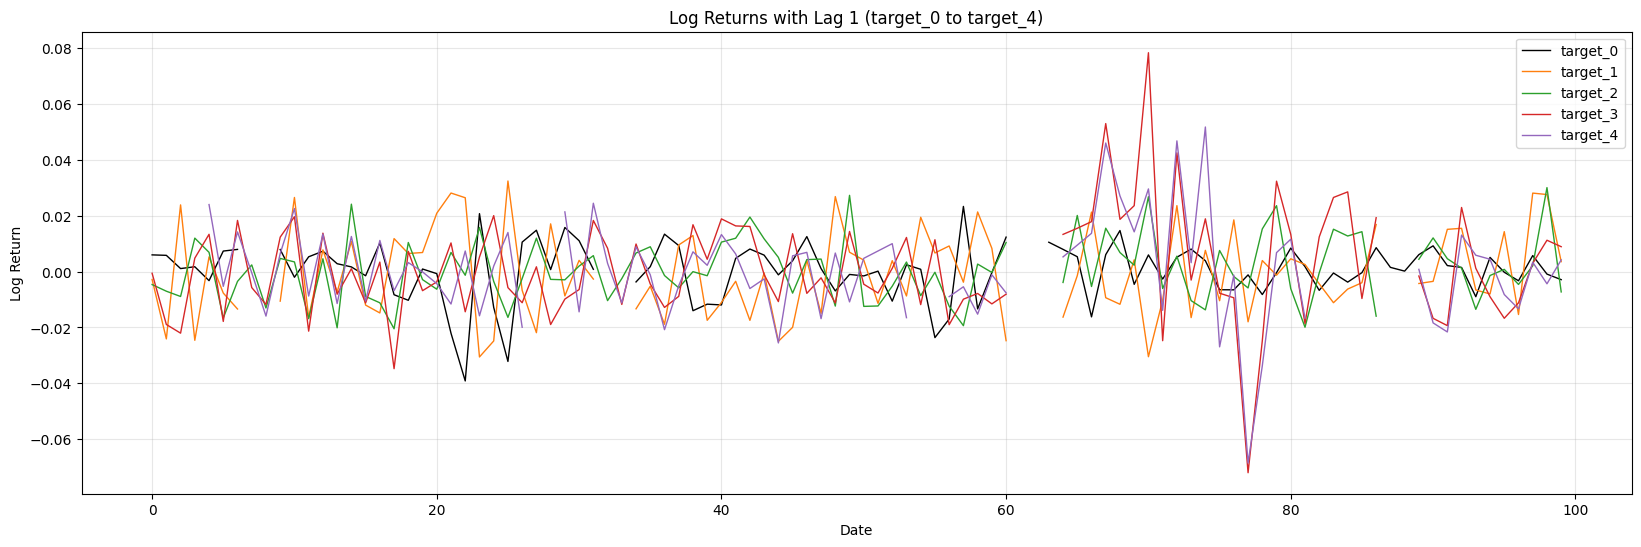

In [77]:
import matplotlib.pyplot as plt
import numpy as np

def plot_targets(df_train_label, start_target=1, end_target=10):
    """
    Plot target variables with target_0 always included
    
    Parameters:
    - df_train_label: DataFrame with target columns
    - start_target: Starting target number (default 1)
    - end_target: Ending target number (default 10)
    """
    
    # Always include target_0
    columns = ['target_0']
    colors = ['black']
    labels = ['target_0']

    df_plot = df_train_label.iloc[:100]
    
    # Add additional targets based on range
    for i in range(start_target, end_target + 1):
        target_col = f'target_{i}'
        if target_col in df_train_label.columns:
            columns.append(target_col)
            # Generate different colors for additional targets
            color = plt.cm.tab10(i % 10)  # Use colormap for variety
            colors.append(color)
            labels.append(target_col)
    
    print(f"Plotting columns: {columns}")
    
    plt.figure(figsize=(20, 6))
  
    for col, color, label in zip(columns, colors, labels):
        plt.plot(df_plot['date_id'], df_plot[col], 
                color=color, label=label, linewidth=1)
    
    plt.title(f'Log Returns with Lag 1 (target_0 to target_{end_target})')
    plt.xlabel('Date')
    plt.ylabel('Log Return')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Example usage:
# Plot target_0 and target_1 to target_5
plot_targets(df_train_label, start_target=1, end_target=4)


In [36]:
train_JP

['JPX_Gold_Mini_Futures_Open',
 'JPX_Gold_Rolling-Spot_Futures_Open',
 'JPX_Gold_Standard_Futures_Open',
 'JPX_Platinum_Mini_Futures_Open',
 'JPX_Platinum_Standard_Futures_Open',
 'JPX_RSS3_Rubber_Futures_Open',
 'JPX_Gold_Mini_Futures_High',
 'JPX_Gold_Rolling-Spot_Futures_High',
 'JPX_Gold_Standard_Futures_High',
 'JPX_Platinum_Mini_Futures_High',
 'JPX_Platinum_Standard_Futures_High',
 'JPX_RSS3_Rubber_Futures_High',
 'JPX_Gold_Mini_Futures_Low',
 'JPX_Gold_Rolling-Spot_Futures_Low',
 'JPX_Gold_Standard_Futures_Low',
 'JPX_Platinum_Mini_Futures_Low',
 'JPX_Platinum_Standard_Futures_Low',
 'JPX_RSS3_Rubber_Futures_Low',
 'JPX_Gold_Mini_Futures_Close',
 'JPX_Gold_Rolling-Spot_Futures_Close',
 'JPX_Gold_Standard_Futures_Close',
 'JPX_Platinum_Mini_Futures_Close',
 'JPX_Platinum_Standard_Futures_Close',
 'JPX_RSS3_Rubber_Futures_Close',
 'JPX_Gold_Mini_Futures_Volume',
 'JPX_Gold_Rolling-Spot_Futures_Volume',
 'JPX_Gold_Standard_Futures_Volume',
 'JPX_Platinum_Mini_Futures_Volume',
 'JP

In [37]:
train_JP_open = [x for x in train_JP if x[-5:]=='_Open']
train_JP_high = [x for x in train_JP if x[-5:]=='_High']
train_JP_low = [x for x in train_JP if x[-4:]=='_Low']
train_JP_close = [x for x in train_JP if x[-6:]=='_Close']
train_JP_volume = [x for x in train_JP if x[-7:]=='_Volume']
train_JP_settlement = [x for x in train_JP if x[-17:]=='_settlement_price']
train_JP_open_int = [x for x in train_JP if x[-14:]=='_open_interest']

print(len(train_JP)) 
print(len(train_JP_open) + len(train_JP_high) + len(train_JP_low) + len(train_JP_close) + len(train_JP_volume) + len(train_JP_settlement) + len(train_JP_open_int))

40
40


In [42]:
train_JP_open

['JPX_Gold_Mini_Futures_Open',
 'JPX_Gold_Rolling-Spot_Futures_Open',
 'JPX_Gold_Standard_Futures_Open',
 'JPX_Platinum_Mini_Futures_Open',
 'JPX_Platinum_Standard_Futures_Open',
 'JPX_RSS3_Rubber_Futures_Open']

In [39]:
train_JP_high

['JPX_Gold_Mini_Futures_High',
 'JPX_Gold_Rolling-Spot_Futures_High',
 'JPX_Gold_Standard_Futures_High',
 'JPX_Platinum_Mini_Futures_High',
 'JPX_Platinum_Standard_Futures_High',
 'JPX_RSS3_Rubber_Futures_High']